---
Fuzzy Sugeno
---

In [22]:
# mengimpor library
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [23]:
# menentukan variabel kasus
Cuaca = np.arange(0, 135, 1)
Suhu = np.arange(0, 44, 1)
Kecepatanangin = np.arange(0, 80, 1)
Hujan = np.arange(0, 130, 1)


In [24]:
# menentukan Range Himpunan fuzzy
Cuaca_tc = fuzz.trapmf (Cuaca, [0, 0, 60, 75])
Cuaca_cr = fuzz.trapmf (Cuaca, [60, 75, 135, 135 ])

Suhu_rd = fuzz.trapmf (Suhu, [0, 0, 10, 30])
Suhu_tg = fuzz.trapmf (Suhu, [10, 30, 44, 44])

Kecepatanangin_tc = fuzz.trapmf (Kecepatanangin, [0, 0, 30, 50])
Kecepatanangin_cp = fuzz.trapmf (Kecepatanangin, [30, 50, 80, 80])

Hujan_rg = fuzz.trapmf (Hujan, [0, 0, 50, 80])
Hujan_lb = fuzz.trapmf (Hujan, [50, 80, 130, 130])

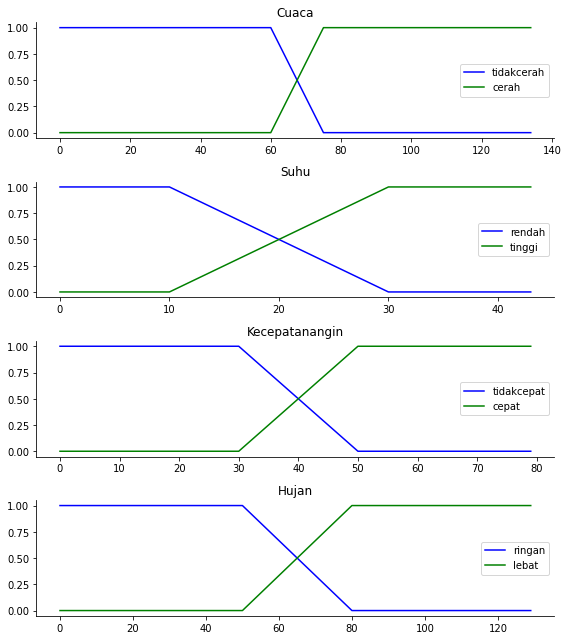

In [25]:
# membuat hipunan fuzzy
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8,9))

ax0.plot(Cuaca, Cuaca_tc, 'b', linewidth=1.5, label='tidakcerah')
ax0.plot(Cuaca, Cuaca_cr, 'g', linewidth=1.5, label='cerah' )

ax0.set_title('Cuaca')
ax0.legend()

ax1.plot(Suhu, Suhu_rd, 'b', linewidth=1.5, label='rendah')
ax1.plot(Suhu, Suhu_tg, 'g', linewidth=1.5, label='tinggi')

ax1.set_title('Suhu')
ax1.legend()

ax2.plot(Kecepatanangin, Kecepatanangin_tc, 'b', linewidth=1.5, label='tidakcepat')
ax2.plot(Kecepatanangin, Kecepatanangin_cp, 'g', linewidth=1.5, label='cepat')

ax2.set_title('Kecepatanangin')
ax2.legend()

ax3.plot(Hujan, Hujan_rg, 'b', linewidth=1.5, label='ringan')
ax3.plot(Hujan, Hujan_lb, 'g', linewidth=1.5, label='lebat')

ax3.set_title('Hujan')
ax3.legend()

for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [32]:
# mengimput nilai kasus
cu = 100
sh = 34
kc = 50

In [36]:
# menentukan Rule Base
"""
[R1] jika suhu rendah, kecepatan angin tidak cepat dan cuaca tidak cerah maka hujan = 1* kecepatan angin + 1* cuaca
[R2] jika suhu rendah, kecepatan angin tidak cepat dan cuaca cerah maka hujan = 1* kecepatan angin + 1* cuaca + 1
[R3] jika suhu rendah, kecepatan angin cepat dan cuaca tidak cerah maka hujan = 1* kecepatan angin + 1* cuaca + 1
[R4] jika suhu rendah, kecepatan angin cepat dan cuaca cerah maka hujan  = kecepatan angin + 1 cuaca
[R5] jika suhu tinggi, kecepatan angin tidak cepat dan cuaca tidak cerah maka hujan = 1 * kecepatan angin + 1 * cuaca + 1
[R6] jika suhu tinggi, kecepatan angin tidak cepat dan cuaca cerah maka hujan = kecepatan angin + 1 cuaca
[R7] jika suhu tinggi, kecepatan angin cepat dan cuaca tidak cerah maka hujan = kecepatan angin + 1 cuaca
[R8] jika suhu tinggi, kecepatan angin cepat dan cuaca cerah maka hujan = kecepatan angin + 1 cuaca


Domain Presentase cuaca:
RENDAH --> Z = 1 * kc + 1 * lb + 1
TINGGI --> Z = kc + 1 * 1

""";


In [39]:
# menentukan derajat keanggotaan
a = []
a.append(fuzz.interp_membership(Cuaca, Cuaca_tc, cu))
a.append(fuzz.interp_membership(Cuaca, Cuaca_cr, cu))

b = []
b.append(fuzz.interp_membership(Suhu, Suhu_rd, sh))
b.append(fuzz.interp_membership(Suhu, Suhu_tg, sh))

c = []
c.append(fuzz.interp_membership(Kecepatanangin, Kecepatanangin_tc, kc))
c.append(fuzz.interp_membership(Kecepatanangin, Kecepatanangin_cp, kc))

print("Cuaca")
if a[0] > 0:
    print("tidakcerah: "+str(a[0]))
if a[1] > 0:
    print("cerah: "+str(a[1]))

print("Suhu")
if b[0] > 0:
    print("rendah: "+str(b[0]))
if b[1] > 0:
    print("tinggi: "+str(b[1]))

print("Kecepatanangin")
if c[0] > 0:
    print("tidakcepat: "+str(c[0]))
if c[1] > 0:
    print("cepat: "+str(c[1]))

Cuaca
tidakcerah: 1.0
Suhu
tinggi: 1.0
Kecepatanangin
cepat: 1.0


---
Memodelkan Rule Base dan Inferensi Sugeno
---
[R1] jika suhu rendah, kecepatan angin tidak cepat dan cuaca tidak cerah maka hujan = 1* kecepatan angin + 1* cuaca
[R2] jika suhu rendah, kecepatan angin tidak cepat dan cuaca cerah maka hujan = 1* kecepatan angin + 1* cuaca + 1
[R3] jika suhu rendah, kecepatan angin cepat dan cuaca tidak cerah maka hujan = 1* kecepatan angin + 1* cuaca + 1
[R4] jika suhu rendah, kecepatan angin cepat dan cuaca cerah maka hujan  = kecepatan angin + 1 cuaca
[R5] jika suhu tinggi, kecepatan angin tidak cepat dan cuaca tidak cerah maka hujan = 1 * kecepatan angin + 1 * cuaca + 1
[R6] jika suhu tinggi, kecepatan angin tidak cepat dan cuaca cerah maka hujan = kecepatan angin + 1 cuaca
[R7] jika suhu tinggi, kecepatan angin cepat dan cuaca tidak cerah maka hujan = kecepatan angin + 1 cuaca
[R8] jika suhu tinggi, kecepatan angin cepat dan cuaca cerah maka hujan = kecepatan angin + 1 cuaca


Domain Presentase cuaca:
RENDAH --> Z = 1 * kc + 1 * lb + 1
TINGGI --> Z = kc + 1 * 1
---;


In [43]:
#Memodelkan Ruke Base dan Inferensi Sugeno

x1 = np.fmin(a[0], b[0])
apred1 = np.fmin(x1, c[0])
print("Lebat, Nilai apred1 = ", apred1)
z1 = 1 * kc + 1 * cu
print("Nilai z1 = ", z1)

x2 = np.fmin(a[0], b[0])
apred2 = np.fmin(x2, c[1])
print("Ringan Nilai apred2 = ", apred2)
z2 = 1 * kc + 1 * cu + 1
print("Nilai z2 = ", z2)

x3 = np.fmin(a[0], b[1])
apred3 = np.fmin(x3, c[0])
print("Lebat, Nilai apred3 = ", apred3)
z3 = 1 * kc + 1 * cu + 1
print("Nilai z3 = ", z3)

x4 = np.fmin(a[0], b[1])
apred4 = np.fmin(x4, c[1])
print("Ringan, Nilai apred4 = ", apred4)
z4 = kc + 1 * cu
print("Nilai z4 = ", z4)

x5 = np.fmin(a[1], b[0])
apred5 = np.fmin(x5, c[0])
print("Ringan, Nilai apred5 = ", apred5)
z5 = 1 * kc + 1 * cu + 1
print("Nilai z5 = ", z5)


x6 = np.fmin(a[1], b[0])
apred6 = np.fmin(x6, c[1])
print("Ringan, Nilai apred6 = ", apred6)
z6 = kc + 1 * cu
print("Nilai z6 = ", z6)

x7 = np.fmin(a[1], b[1])
apred7 = np.fmin(x7, c[0])
print("Lebat, Nilai apred7 = ", apred7)
z7 = kc + 1 * cu
print("Nilai z7 = ", z7)

x8 = np.fmin(a[1], b[1])
apred8 = np.fmin(x8, c[1])
print("Ringan, Nilai apred8 = ", apred8)
z8 = kc + 1 * cu
print("Nilai z8 = ", z8)

Lebat, Nilai apred1 =  0.0
Nilai z1 =  104
Ringan Nilai apred2 =  0.0
Nilai z2 =  105
Lebat, Nilai apred3 =  0.0
Nilai z3 =  105
Ringan, Nilai apred4 =  1.0
Nilai z4 =  104
Ringan, Nilai apred5 =  0.0
Nilai z5 =  105
Ringan, Nilai apred6 =  0.0
Nilai z6 =  104
Lebat, Nilai apred7 =  0.0
Nilai z7 =  104
Ringan, Nilai apred8 =  0.0
Nilai z8 =  104
